In [1]:
import numpy as np
import pandas as pd
import numpy
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("TCS_stock_history.csv")

In [3]:
df.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2002-08-12,28.794172,29.742206,28.794172,29.519140,212976,0.0,0.0
1,2002-08-13,29.556316,30.030333,28.905705,29.119476,153576,0.0,0.0
2,2002-08-14,29.184536,29.184536,26.563503,27.111877,822776,0.0,0.0
3,2002-08-15,27.111877,27.111877,27.111877,27.111877,0,0.0,0.0
4,2002-08-16,26.972458,28.255089,26.582090,27.046812,811856,0.0,0.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4463 entries, 0 to 4462
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          4463 non-null   object 
 1   Open          4463 non-null   float64
 2   High          4463 non-null   float64
 3   Low           4463 non-null   float64
 4   Close         4463 non-null   float64
 5   Volume        4463 non-null   int64  
 6   Dividends     4463 non-null   float64
 7   Stock Splits  4463 non-null   float64
dtypes: float64(6), int64(1), object(1)
memory usage: 279.1+ KB


In [5]:
df.describe()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
count,4463.000000,4463.000000,4463.000000,4463.000000,4.463000e+03,4463.000000,4463.000000
mean,866.936239,876.675013,856.653850,866.537398,3.537876e+06,0.071533,0.001344
std,829.905368,838.267104,821.233477,829.611313,3.273531e+06,0.965401,0.051842
min,24.146938,27.102587,24.146938,26.377609,0.000000e+00,0.000000,0.000000
25%,188.951782,191.571816,185.979417,188.594620,1.860959e+06,0.000000,0.000000
50%,530.907530,534.751639,525.616849,529.713257,2.757742e+06,0.000000,0.000000
75%,1156.462421,1165.815854,1143.622800,1154.784851,4.278625e+06,0.000000,0.000000
max,3930.000000,3981.750000,3892.100098,3954.550049,8.806715e+07,40.000000,2.000000


In [6]:
df.isnull()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
4458,False,False,False,False,False,False,False,False
4459,False,False,False,False,False,False,False,False
4460,False,False,False,False,False,False,False,False
4461,False,False,False,False,False,False,False,False


In [7]:
df.isnull().sum()

Date            0
Open            0
High            0
Low             0
Close           0
Volume          0
Dividends       0
Stock Splits    0
dtype: int64

Text(0, 0.5, 'Price ($)')

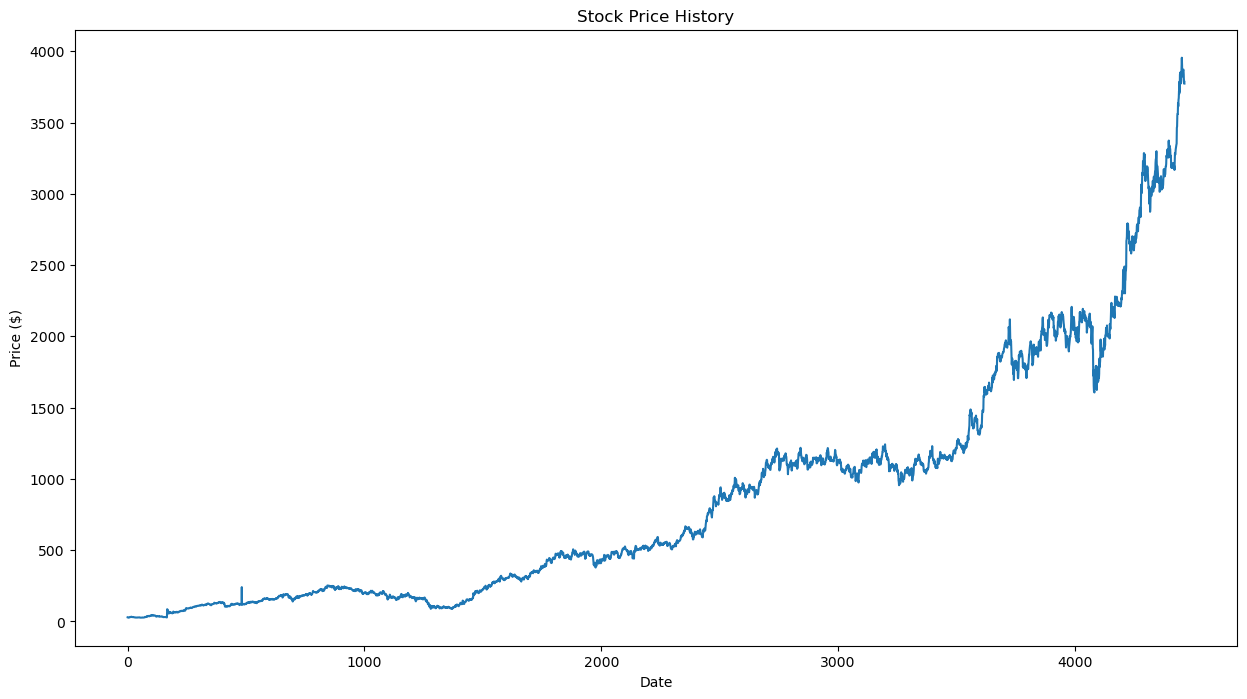

In [8]:
plt.figure(figsize=(15, 8))
plt.title('Stock Price History')
plt.plot(df['Close'])
plt.xlabel('Date')
plt.ylabel('Price ($)')

C:\Users\SARTAJ\AppData\Local\Temp\ipykernel_11084\3413075636.py:2: FutureWarning: Dropping of nuisance columns in rolling operations is deprecated; in a future version this will raise TypeError. Select only valid columns before calling the operation. Dropped columns were Index(['Date'], dtype='object')
  df.rolling(7).mean().head(15)
C:\Users\SARTAJ\AppData\Local\Temp\ipykernel_11084\3413075636.py:4: FutureWarning: Dropping of nuisance columns in rolling operations is deprecated; in a future version this will raise TypeError. Select only valid columns before calling the operation. Dropped columns were Index(['Date'], dtype='object')
  df.rolling(window=30).mean()['Open'].plot()


<Axes: >

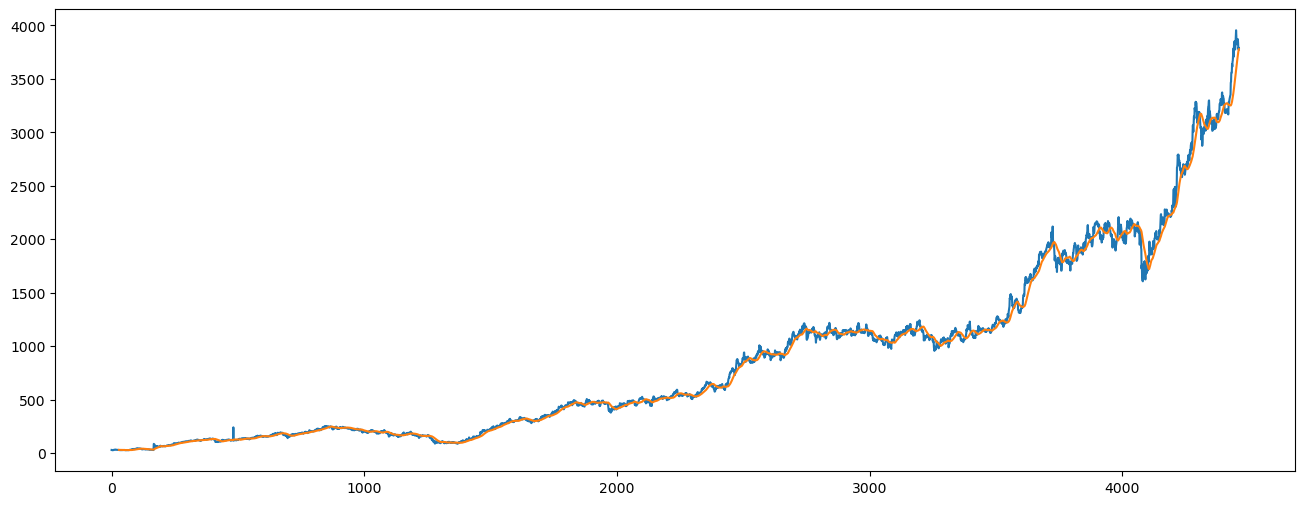

In [9]:
#Rolling mean
df.rolling(7).mean().head(15)
df['Close'].plot(figsize=(16,6))
df.rolling(window=30).mean()['Open'].plot()

In [10]:
#Pie chart
df['open-close']  = df['Open'] - df['Close']
df['low-high']  = df['Low'] - df['High']
df['target'] = np.where(df['Close'].shift(-1) > df['Close'], 1, 0)

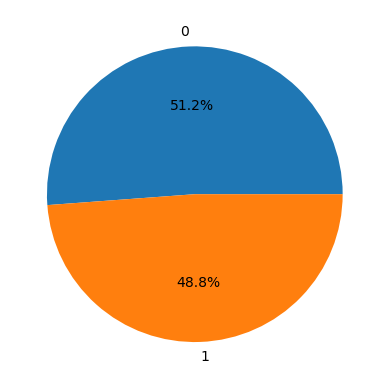

In [11]:
plt.pie(df['target'].value_counts().values,
        labels=[0, 1], autopct='%1.1f%%')
plt.show()

In [12]:
df1 = df.reset_index()['Close']

In [13]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (0,1) )
df1 = scaler.fit_transform(np.array(df1).reshape(-1,1))
df1

array([[7.99743657e-04],
       [6.98000688e-04],
       [1.86923614e-04],
       ...,
       [9.55348155e-01],
       [9.58593939e-01],
       [9.53833468e-01]])

In [14]:
train_size = int(len(df1)*0.75)
test_size = len(df1) - train_size
train_size, test_size

(3347, 1116)

In [15]:
# Modelling
train_data, test_data = df1[0:train_size: ], df1[train_size:len(df1), :1]

In [16]:
def create_dataset(dataset, time_step = 1):
    data_x, data_y = [], []
    for i in range(len(dataset) - time_step - 1):
        a = dataset[i:(i+time_step),0]
        data_x.append(a)
        data_y.append(dataset[i+time_step,0])
    return numpy.array(data_x), numpy.array(data_y)

In [17]:
time_step = 100
x_train, y_train = create_dataset(train_data, time_step)
x_test, y_test = create_dataset(test_data, time_step)

In [18]:
x_train

array([[7.99743657e-04, 6.98000688e-04, 1.86923614e-04, ...,
        3.45686811e-03, 3.74553324e-03, 3.50892362e-03],
       [6.98000688e-04, 1.86923614e-04, 1.86923614e-04, ...,
        3.74553324e-03, 3.50892362e-03, 4.10281426e-03],
       [1.86923614e-04, 1.86923614e-04, 1.70359834e-04, ...,
        3.50892362e-03, 4.10281426e-03, 4.66358121e-03],
       ...,
       [2.73793855e-01, 2.74436561e-01, 2.71049134e-01, ...,
        2.91474908e-01, 2.83438136e-01, 2.86062781e-01],
       [2.74436561e-01, 2.71049134e-01, 2.70794438e-01, ...,
        2.83438136e-01, 2.86062781e-01, 2.86626151e-01],
       [2.71049134e-01, 2.70794438e-01, 2.73324862e-01, ...,
        2.86062781e-01, 2.86626151e-01, 2.81312721e-01]])

In [19]:
x_test

array([[0.27903056, 0.27518048, 0.27342101, ..., 0.28724375, 0.28410521,
        0.28680813],
       [0.27518048, 0.27342101, 0.27549987, ..., 0.28410521, 0.28680813,
        0.28601896],
       [0.27342101, 0.27549987, 0.27720139, ..., 0.28680813, 0.28601896,
        0.28933408],
       ...,
       [0.76420221, 0.77581752, 0.7797988 , ..., 0.97647757, 0.97828505,
        0.97880694],
       [0.77581752, 0.7797988 , 0.78522093, ..., 0.97828505, 0.97880694,
        0.97006239],
       [0.7797988 , 0.78522093, 0.78840593, ..., 0.97880694, 0.97006239,
        0.95534816]])

In [20]:
x_train = x_train.reshape(x_train.shape[0], x_train.shape[1], 1)
x_test = x_test.reshape(x_test.shape[0], x_test.shape[1], 1)

In [21]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
import tensorflow as tf
import math
from sklearn.metrics import mean_squared_error

from keras.layers import Dropout,  Bidirectional

In [22]:
model = Sequential()
model.add(LSTM(50, return_sequences = True, input_shape = (100,1)))
model.add(LSTM(50, return_sequences = True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [23]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50851 (198.64 KB)
Trainable params: 50851 (198.64 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [24]:
model.fit(x_train, y_train, epochs=50,validation_data=(x_test, y_test), verbose=1)

Epoch 1/50
102/102 [==============================] - 17s 108ms/step - loss: 0.0011 - val_loss: 0.0046
Epoch 2/50
102/102 [==============================] - 11s 107ms/step - loss: 4.4595e-05 - val_loss: 0.0061
Epoch 3/50
102/102 [==============================] - 10s 94ms/step - loss: 4.7860e-05 - val_loss: 0.0082
Epoch 4/50
102/102 [==============================] - 10s 99ms/step - loss: 5.4232e-05 - val_loss: 0.0051
Epoch 5/50
102/102 [==============================] - 10s 96ms/step - loss: 4.3197e-05 - val_loss: 0.0041
Epoch 6/50
102/102 [==============================] - 10s 96ms/step - loss: 4.5264e-05 - val_loss: 0.0051
Epoch 7/50
102/102 [==============================] - 10s 97ms/step - loss: 4.5147e-05 - val_loss: 0.0041
Epoch 8/50
102/102 [==============================] - 9s 93ms/step - loss: 4.7789e-05 - val_loss: 0.0040
Epoch 9/50
102/102 [==============================] - 9s 86ms/step - loss: 4.3436e-05 - val_loss: 0.0047
Epoch 10/50
102/102 [=============================

In [25]:
test_predict = model.predict(x_test)
train_predict = model.predict(x_train)

102/102 [==============================] - 3s 27ms/step


In [26]:
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)

In [27]:
back = 100
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[back:len(train_predict)+back, :] = train_predict

In [28]:
# Test predictions
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(back*2)+1:len(df1)-1, :] = test_predict

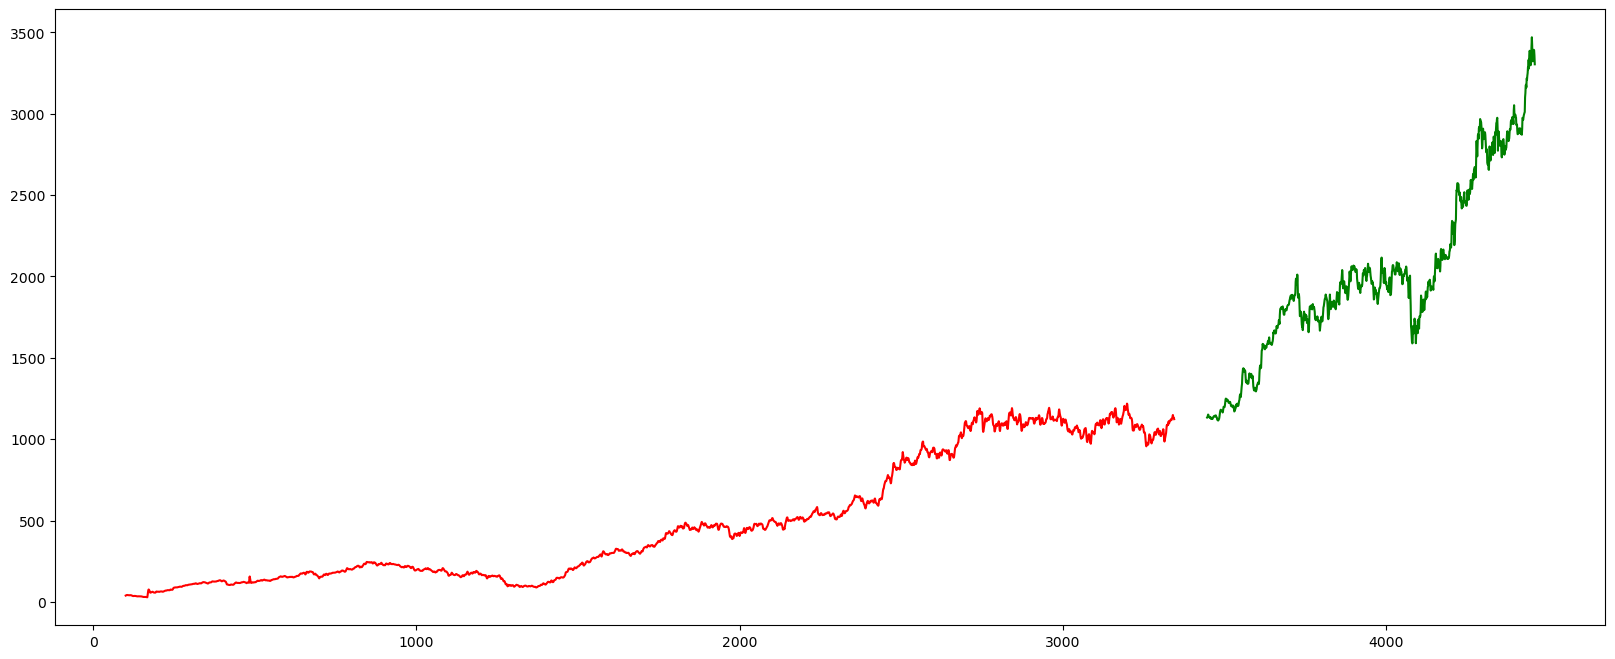

In [29]:
plt.subplots(figsize=(20,8))
plt.plot(trainPredictPlot,color='red')
plt.plot(testPredictPlot,color='green')
plt.show()

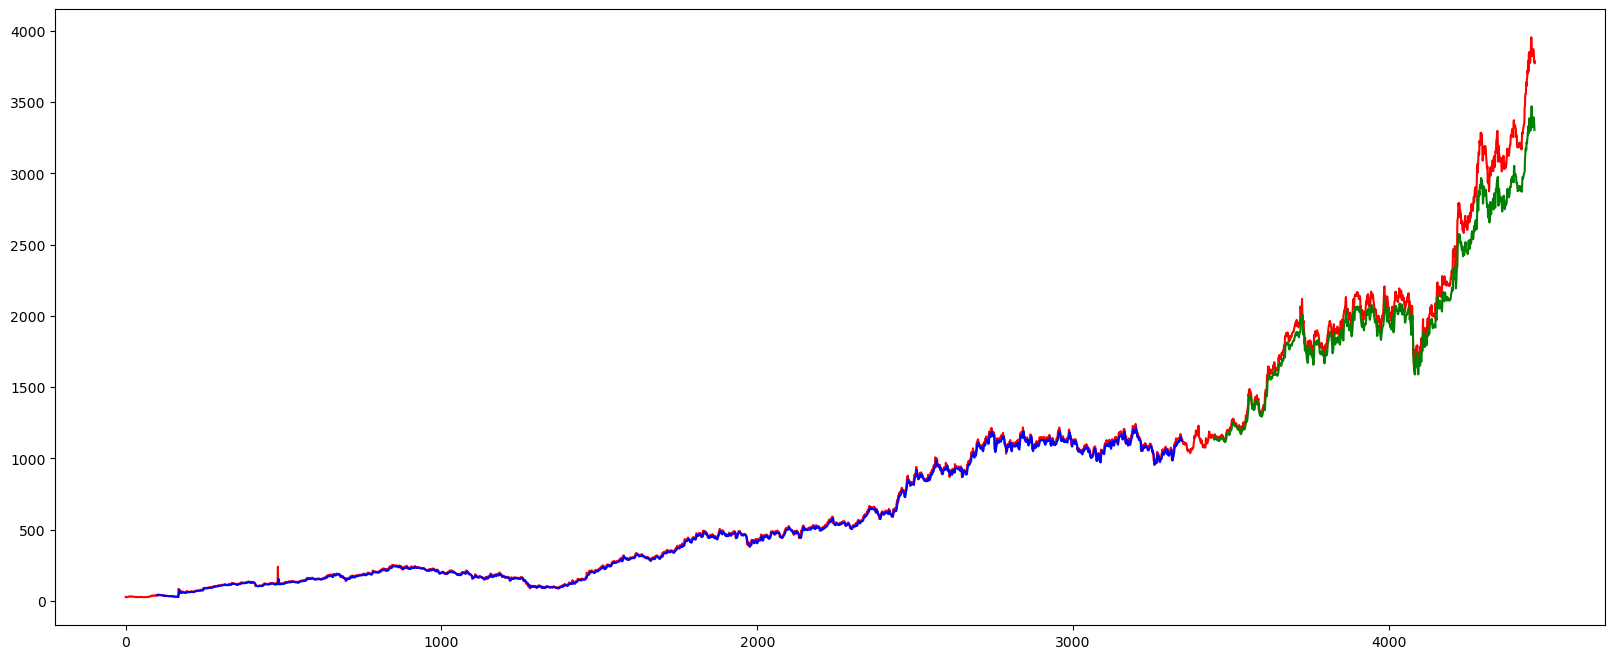

In [30]:
# Baseline and predictions
plt.subplots(figsize=(20,8))
plt.plot(scaler.inverse_transform(df1), color = 'red')
plt.plot(trainPredictPlot, color = 'blue')
plt.plot(testPredictPlot, color = 'green')
plt.show()

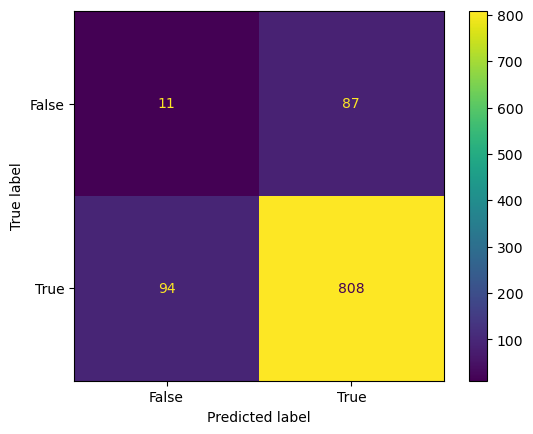

In [32]:
import matplotlib.pyplot as plt
import numpy
from sklearn import metrics

actual = numpy.random.binomial(1,.9,size = 1000)
predicted = numpy.random.binomial(1,.9,size = 1000)

confusion_matrix = metrics.confusion_matrix(actual, predicted)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.show()